# **IMPORT LIBRARY**

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **MENGHUBUNGKAN DENGAN GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [6]:
path = "/content/grive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum07"

# **LOAD DATA & DATA PREPARATION**

In [7]:
#Membaca dataset
df = pd.read_csv(path + "/data/college.csv")
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [8]:
# melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [9]:
# cek missing value
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [10]:
# cek duplikat
df.duplicated().sum()

np.int64(0)

In [11]:
# Cek distribusi kelas target
df['Plan'].value_counts()

,count
Plan,
not plan,5404
plan,2596


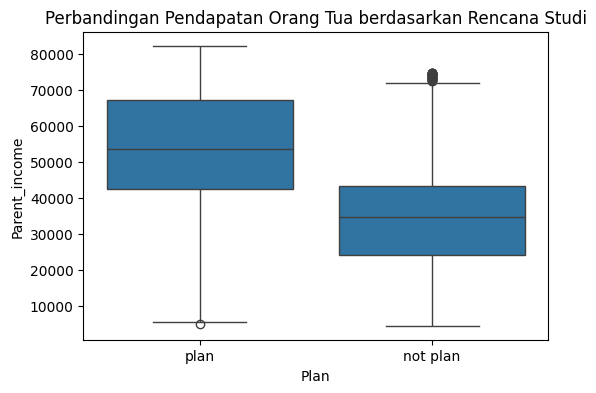

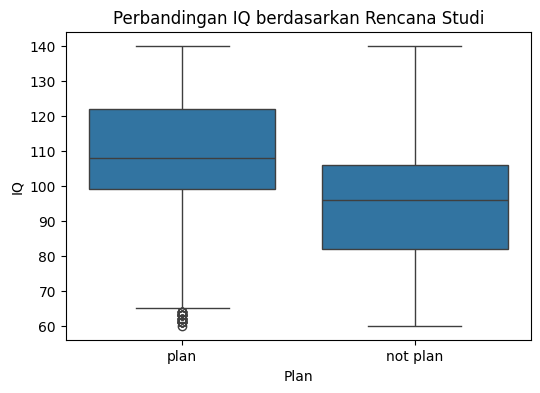

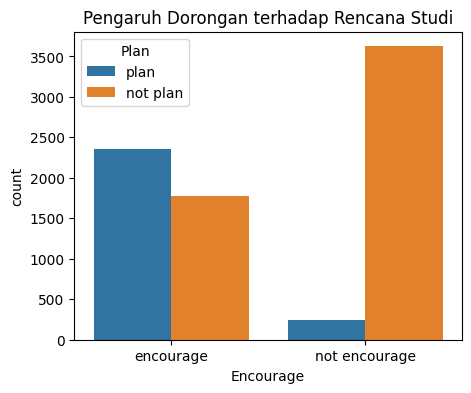

In [12]:
# Pendapatan orang tua vs Plan
plt.figure(figsize=(6,4))
sns.boxplot(x='Plan', y='Parent_income', data=df)
plt.title("Perbandingan Pendapatan Orang Tua berdasarkan Rencana Studi")
plt.show()

# IQ vs Plan
plt.figure(figsize=(6,4))
sns.boxplot(x='Plan', y='IQ', data=df)
plt.title("Perbandingan IQ berdasarkan Rencana Studi")
plt.show()

# Encourage vs Plan
plt.figure(figsize=(5,4))
sns.countplot(x='Encourage', hue='Plan', data=df)
plt.title("Pengaruh Dorongan terhadap Rencana Studi")
plt.show()

In [13]:
# Hapus kolom StudentID karena bukan fitur prediktif
df = df.drop(columns=['StudentID'])

# Encode kategori ke numerik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop(columns=['Plan'])
y = df['Plan']

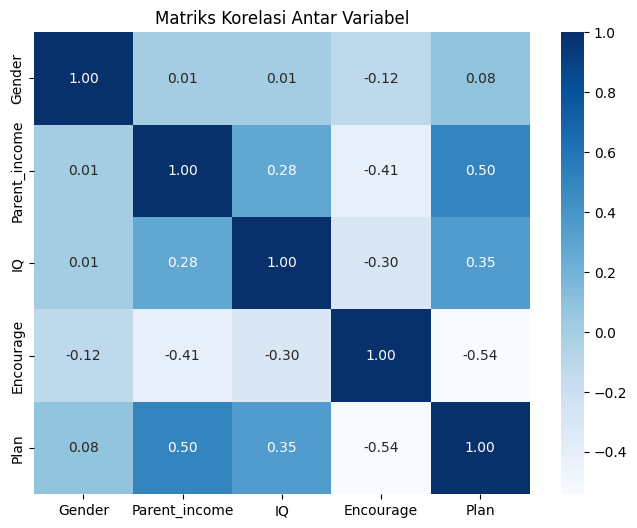

In [14]:
# Hitung korelasi
corr = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

In [15]:
# Split data untuk training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **PEMBUATAN MODEL DENGAN DECISSION TREE**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Buat model pohon keputusan
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# **EVALUASI MODEL**

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.81875

Confusion Matrix:
 [[982  99]
 [191 328]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1081
           1       0.77      0.63      0.69       519

    accuracy                           0.82      1600
   macro avg       0.80      0.77      0.78      1600
weighted avg       0.81      0.82      0.81      1600



# **VISUALISASI MODEL**

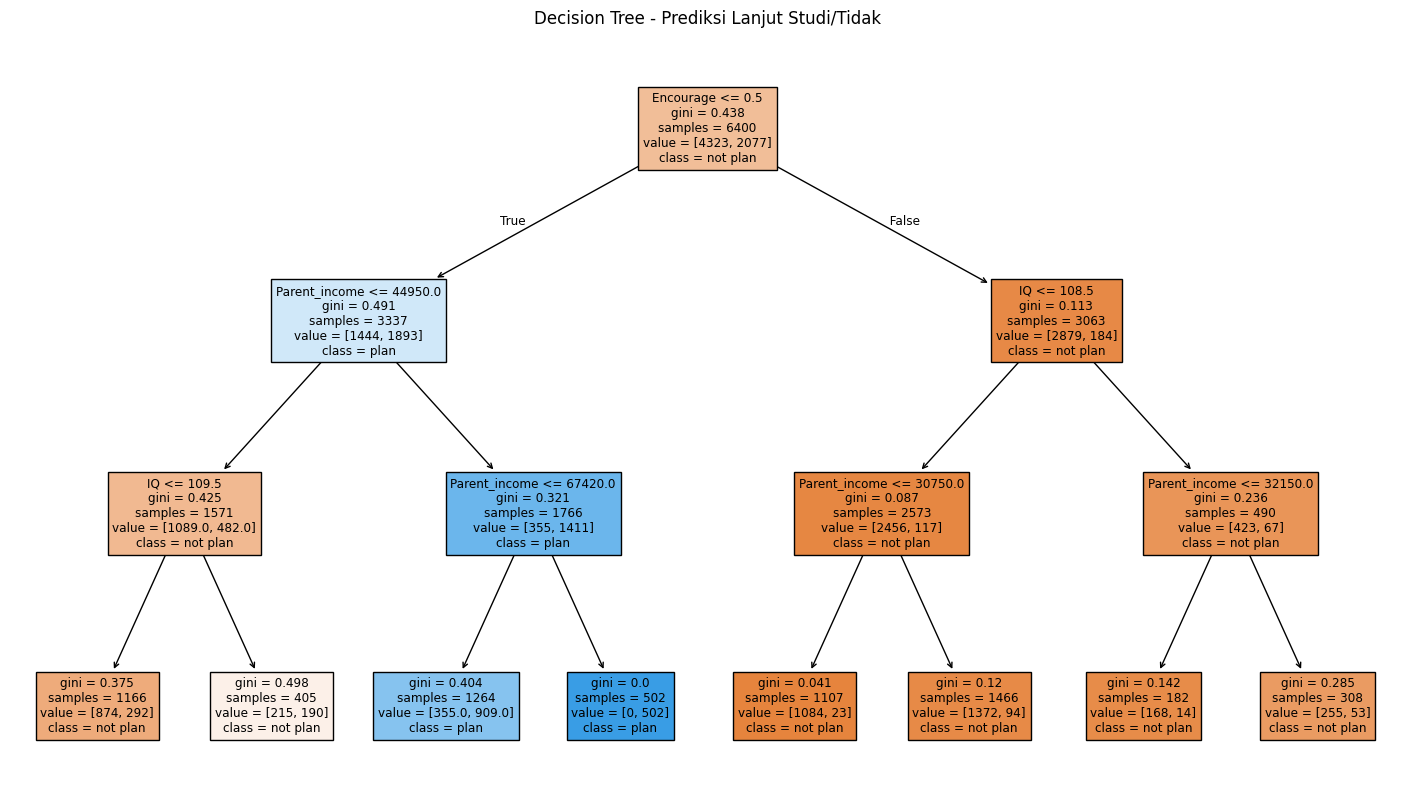

In [18]:
# visualisasi model
from sklearn import tree
plt.figure(figsize=(18,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['not plan', 'plan'], filled=True)
plt.title("Decision Tree - Prediksi Lanjut Studi/Tidak")
plt.show()

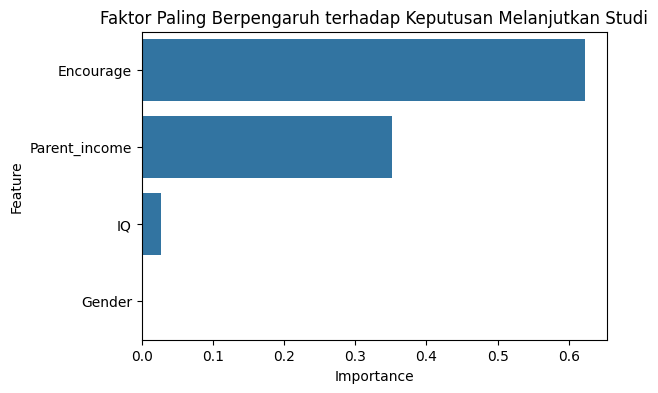

,Feature,Importance
3,Encourage,0.621928
1,Parent_income,0.351117
2,IQ,0.026954
0,Gender,0.000000


In [19]:
# melihat pengaruh tiap variabel
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Faktor Paling Berpengaruh terhadap Keputusan Melanjutkan Studi")
plt.show()

importance